<a href="https://colab.research.google.com/github/BurleighCharlton/Python-Mathematics/blob/main/Prime_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prime Exploration

By Conrad Ainslie, Akshita Bafna, Burleigh Charlton, Yang Li, Kevin Nguyen

INTRO CELL   
-questions we are answering   
-a little about our process

In [2]:
#imports for making our images
import numpy as np
import matplotlib.pyplot as plt
from mpmath import li
from PIL import Image, ImageDraw # Load the package.
import math 

In [3]:
#stuff we have 'borrowed' from marty in notebook 3
def isprime_list(n):
    ''' 
    Return a list of length n+1
    with Trues at prime indices and Falses at composite indices.
    '''
    flags = [True] * (n+1)  # A list [True, True, True,...] to start.
    flags[0] = False  # Zero is not prime.  So its flag is set to False.
    flags[1] = False  # One is not prime.  So its flag is set to False.
    flags[4::2] = [False] * ((n-2)//2)
    p = 3
    while p <= np.sqrt(n):  # We only need to sieve by p is p <= sqrt(n).
        if flags[p]:  # We sieve the multiples of p if flags[p]=True.
            flags[p*p::2*p] = [False] * ((n-p*p)//(2*p)+1) # Sieves out multiples of p, starting at p*p.
        p = p + 2 # Try the next value of p.
        
    return flags


def where(L):
    '''
    Take a list of booleans as input and
    outputs the list of indices where True occurs.
    '''
    return [n for n in range(len(L)) if L[n]]

def primes_upto(x,primes):
  '''
  Gives primes up to x from a list of primes, primarily used as pi(x), the prime counting function.
  '''
  return len([p for p in primes if p <= x]) # List comprehension recovers the primes up to x.

#Burleighs PIL corner

This exploration focuses on using PIL to show the location of pseudoprimes using fermat test $$a^{n-1} mod (n) = 1$$  
The general graphing process is as follows
1.   init all black square
2.   check all numbers with fermat test a=2
3.   Color all that pass a=2 with red, a=3 green, and a=5 blue
4.   Now we have a map of mostly white values 
5.   Overlay all true primes in a grey color

The fermat primality test will always overestimate the amount of primes. i.e. every prime passes the test, but there are non primes that the fermat test would tell us are probably prime. These are pseudoprimes, and very difficult to detect pseudoprimes are called carmichael numbers with respect to the fermat primality test. We can see a few of these numbers in our images. Among 4 factor Carmichael numbers we have 41041 and 627045 clearly visible as white dots in our images. We also get several quasi-Carmichael numbers making up most of our red, green, and blue dots at 35, 77, 143, 165, 187, 209, 221, 231, 247, and many others.





##Init Prime lists
Here I create a prime list and a bigger prime list in the form of a numpy array for use in imaging

In [4]:
primelist100000 = np.asarray(where(isprime_list(100000)))
bigprimelist = np.asarray(where(isprime_list(1024*1024)))

##Seive Image

This is a codeblock that shows all of the primes from the seive

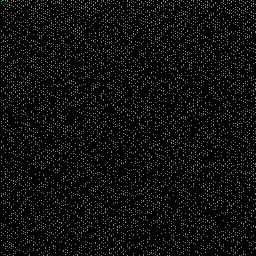

In [5]:

primesquare = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
      if (x+(256*y) in primelist100000):
        primesquare[y,x] = [0,180,180]

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

##Fermat Test Code
Here is my implementation of the fermat test   
It takes a number to test and a value to witness primes until   
e.g.   
an input of 67,5 would attempt to witness a = 2,3,5,7,13 against 67 a nd produce an array of 1s and 0s indicating if witnessing occured or not

In [6]:
def fermat_test(n, a):
  '''
  takes a number n to test
  and the first  as a witness
  returns true if a witness n as prime
  a^n-1 mod n = 0 is evidence for primality
  fermat_test: num, num -> array 
  '''
  if n==0:
    return np.zeros((1,a))
  results = np.zeros( (1,a) )
  index=0
  for i in primelist100000[0:a]:
    results[0,index] = (pow(int(i), n-1, n) == 1)
    index+=1
  return results


Testing

In [7]:
print(fermat_test(5,1))
print(pow(2,4,5))

[[1.]]
1


##Create Arrays of Fermat Test Results

Here I create a small list of fermat tuples into an array
Its stuctured

In [8]:
#generates an array of 10 tuples 1 by 256*256 in length
#tuples are the results of the fermat test on the first 10 primes
list_of_fermat_tests_to_10 = np.asarray([fermat_test(i,9) for i in range(0,256*256)])

print(list_of_fermat_tests_to_10[2][0,0:3])
print((list_of_fermat_tests_to_10[2])[0,3:6])
print((list_of_fermat_tests_to_10[2])[0,6:9])

[0. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


Here are larger lists, one to 10 and the other using only the first 3 primes

In [9]:
#these take a bit to run
biglist_of_fermat_tests_to_10 = np.asarray([fermat_test(i,9) for i in range(0,1024*1024)])

In [10]:
biglist_of_fermat_tests_to_3 = np.asarray([fermat_test(i,3) for i in range(0,1024*1024)])

In [ ]:
#these take a bit to run
biglist_of_fermat_tests_to_10 = np.asarray([fermat_test(i,9) for i in range(0,1024*1024)])

##Fermat Test to 10 Image
Here is that same square but with fermat tests. 
We can see here that they are quite similar, this speaks to the accuracy of the fermat test when taken with the first 10 primes.

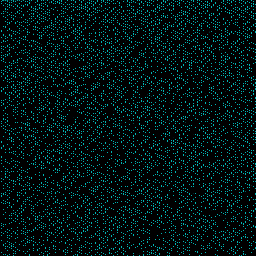

In [22]:
##This generates a list of primes by my fermat test
primesquare = np.zeros((256, 256,3), dtype=np.uint8)
for x in range(256):
    for y in range(256):
        primesquare[y,x] = [0,(20*np.count_nonzero(list_of_fermat_tests_to_10[(256*y)+x])),(20*np.count_nonzero(list_of_fermat_tests_to_10[(256*y)+x]))] # Red = y, Green = 0, Blue = 1-y
img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

##Fermat Test to 10 with Overlayed Primes
Here is the first implementation. This maps the first 4 primes to red, the next three green, and the others to blue among the first 10 primes. Then we color every true prime grey so that we can see the pseudoprimes. 

Here we see a few very bright specks, of varying color. They are few and far between, but rather apparent. I was hoping to see a particular pattern of where these are located. The only qualitative thing I can say is that the are more common among the top half of our square corresponding to numbers less that 500,000

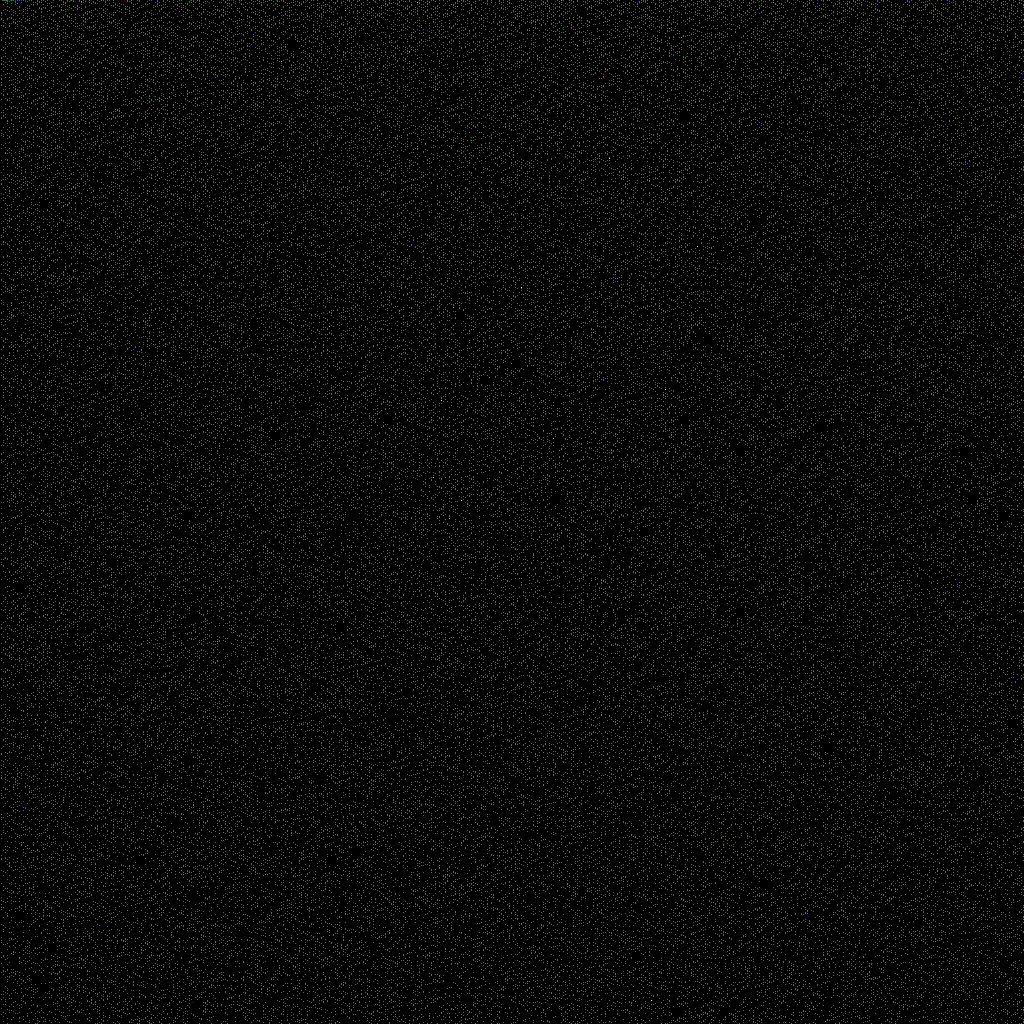

In [24]:
##by segments of primes
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
      if (x+(1024*y) in range(1024*1024)):
        primesquare[y,x] = [64*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,0:3] ==1)), #add red if witnessed by first 3 primes
                            83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,3:6] ==1)), #add green if witnessed by next three primes
                            83*(np.count_nonzero(biglist_of_fermat_tests_to_10[(1024*y)+x][0,6:9] ==1))] #add blue if witnessed by next three primes
        if (x+(1024*y) in bigprimelist):
          primesquare[y,x] = [100,100,100] 

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

##Fermat Test to 3 with Overlayed Primes
This is a rather interesting image.   
First we iterate through applying the fermat test to each pixel with a = 2, 3, 5, and coloring pixels that pass that primality test red, green, and blue respectively. This will net us some results of various colors as well as combinations.   
Next we layer on a grey color on every true prime.   
What this shows us are the pseudoprimes of the three tests that we have run. Pixels that are red are not truly primes, but are instead numbers that pass $2^{n-1} mod (n) = 1$, but are not a prime.

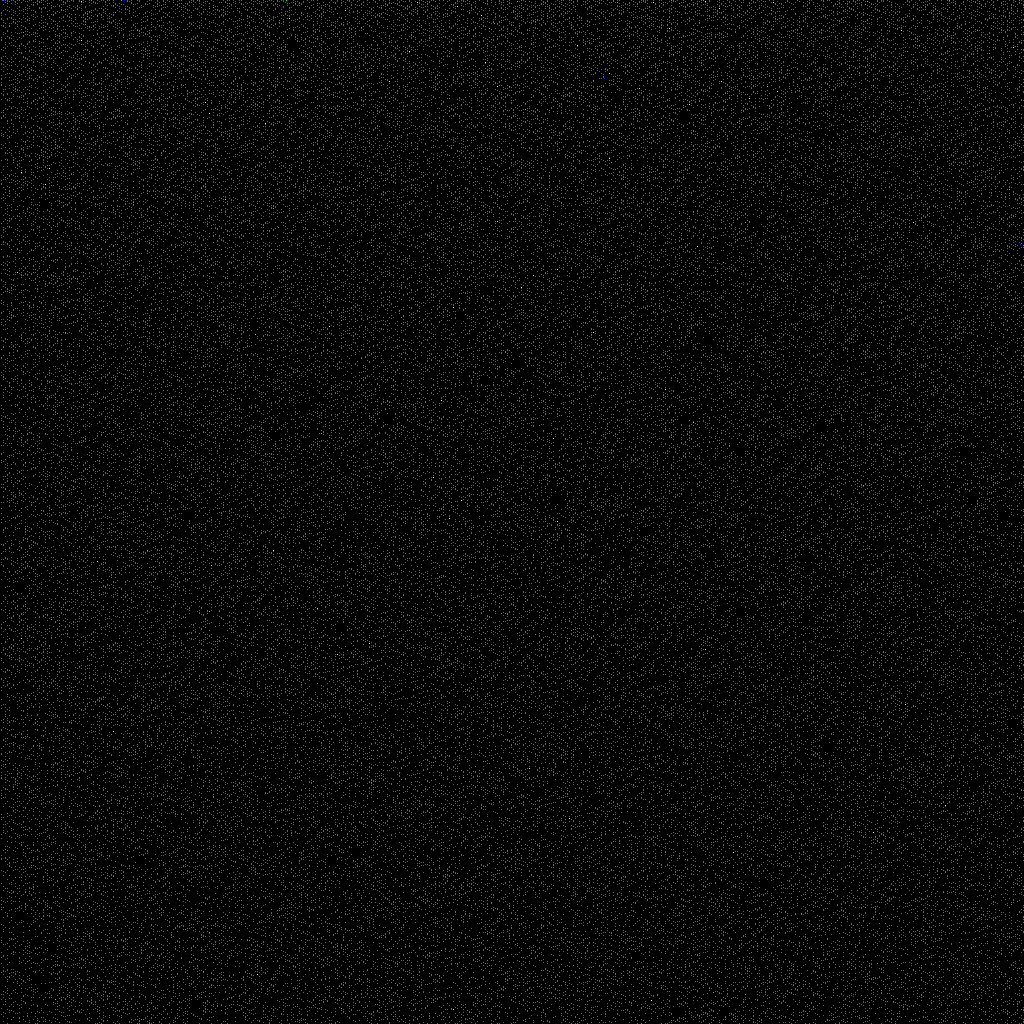

In [ ]:
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
for x in range(1024):
    for y in range(1024):
        primesquare[y,x] = [250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,0] ==1)), #add red if witnessed by first 3 primes
                            250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,1] ==1)), #add green if witnessed by next three primes
                            250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,2] ==1))] #add blue if witnessed by next three primes
        if (x+(1024*y) in bigprimelist):
          primesquare[y,x] = [100,100,100] # Red = y, Green = 0, Blue = 1-y

img = Image.fromarray(primesquare) # Create an image from the array.
display(img)

##Gif Making
This isn't to be turned in, but is rather fun.  


This is a function that makes boxes as above, but takes an input for how dense the cyan color should be   
it is for use in the gif making

In [ ]:
def makeprimesquare(d):
  '''
  makes a prime square of fermat numbers
  then places true primes of d color density
  '''    
  primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)
  for x in range(1024):
      for y in range(1024):
            primesquare[y,x] = [250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,0] ==1)), #add red if witnessed by first 3 primes
                                250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,1] ==1)), #add green if witnessed by next three primes
                                250*(np.count_nonzero(biglist_of_fermat_tests_to_3[(1024*y)+x][0,2] ==1))] #add blue if witnessed by next three primes
            if (d>51):          
              if (x+(1024*y) in bigprimelist):
                primesquare[y,x] = [0,d,d] # Red = y, Green = 0, Blue = 1-y

  img = Image.fromarray(primesquare) # Create an image from the array.
  return img

This generates a gif of growing cyan color on the true primes 

In [ ]:
images = []

max_color = 200
step = 25
primesquare = np.zeros((1024, 1024,3), dtype=np.uint8)

for i in range(0, max_color, step):
    im = makeprimesquare(i)
    img = Image.fromarray(primesquare) # Create an image from the array.
    images.append(im)

images[0].save('primes.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=400, loop=0)

NameError: ignored

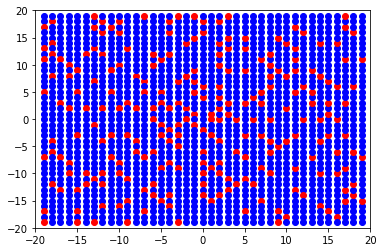

In [ ]:
from sympy import isprime


def generate_xy(n=10):
    direction = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    d = 0

    location = [0, 0]

    i = t = 0
    c = 1

    for _ in range(n):
        yield location
        location = [sum(l) for l in zip(location, direction[d])]
        i += 1

        if i == c:
            d = (d+1) % 4
            t += 1
            i = 0
            if t == 2:
                t = 0
                c += 1

plt.axis([-20, 20, -20, 20])

for number, (x, y) in enumerate(generate_xy(1521), 1):
    plt.plot(x, y, "ro" if isprime(number) else "bo")

# Conrad's stuff


In [ ]:
def primescountingfast(x_vals,primes):
  '''
  Gives number of primes up to x from a list of primes, primarily used as pi(x), the prime counting function. Make sure x_vals is ordered from smallest to largest
  '''
  indx1=1
  num_of=np.concatenate((np.zeros_like(x_vals),np.zeros(1)),axis=None) #making an array of zeros, size len(x_vals)+1
  for x in x_vals:
    num_of[indx1]=num_of[indx1-1] #starting from the last number of primes below the last x, basically cheating off the person who came before you
    a=num_of[indx1-1]
    for p in primes[int(a):]:#counts primes from last x to next x
      if p<=x:
        num_of[indx1]+=1
      else:
        continue #leavs the inner for loop when prime gets bigger than current x
    indx1+=1
  return [num_of[x] for x in range(1,len(num_of))] # List comprehension recovers the number of primes for each x in x vals.

In [ ]:
n=10000 #both this and the next block is to explain why I made a faster prime counting function, remove if we run out of time/space
x_values = np.linspace(0,n,1001)
#x_values = np.arange(0,n+1)
primelistn = (where(isprime_list(n)))

In [ ]:
%timeit pix_value = np.array([primes_upto(x,primelistn) for x in x_values]) 
%timeit pix_values = np.array(primescountingfast(x_values,primelistn))
''' second function is around two times faster'''

10 loops, best of 5: 35.6 ms per loop
100 loops, best of 5: 16.4 ms per loop


' second function is quite faster'

In [ ]:
n=1000000 #dont change, took me ages to find a good mix of n and bin sizes for linspace, if you really wanted to, the max value of n is 700 mil, anything larger and google will cut you off
primelistn = (where(isprime_list(n))) #might take a little while
x_values = np.linspace(0,n,10001)#dont change, or atleast change it back when done
#pix_values = np.array([primes_upto(x,primelistn) for x in x_values]) #this is super slow
pix_values = np.array(primescountingfast(x_values,primelistn)) #faster version of above function, still gonna take awhile
lix=[li(x) for x in x_values] #calculates logarithmic integral of x

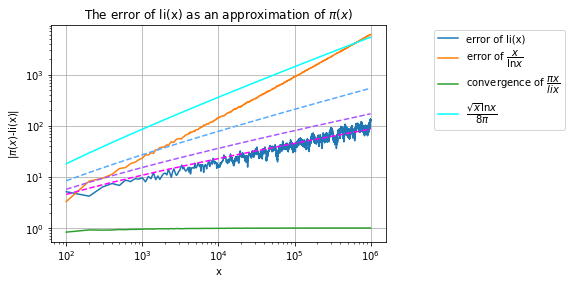

In [ ]:
from matplotlib import cm
plt.plot(x_values[1:],abs(pix_values[1:]-lix[1:]),label='error of li(x)') #main error term
plt.plot(x_values[1:],abs(pix_values[1:]-x_values[1:]/np.log(x_values[1:])),label='error of $\dfrac{x}{\ln{x}}$') #while x/log(x) can be used to approximate primes it is far worse than li(x)
plt.plot(x_values[1:],abs(pix_values[1:]/lix[1:]),label='convergence of $\dfrac{\pi{x}}{li{x}}$')#this small green line is to show that the ratio of pi(x)/li(x) converges to 1 very quickly
                                                                                                 #even though the error term increases forever.
plt.xscale('log')
plt.yscale('log')
a=5 #a-2 is the amount of extra bound lines that get created, used to show that the actual bound, sqrt(x)log(x)/pi*8, is a very large bound.
clrs=np.linspace(0,1,a-1)
clrmap=[cm.cool(x) for x in clrs]
bound2=np.array([x**(1/2)*np.log(x)/8*np.pi for x in x_values[1:]])
for n in range(3,a+1):
  bounda=np.array([x**(1/n)*np.log(x)/8*np.pi for x in x_values[1:]]) #the extra dotted lines are the same as the original bound except its a nth root, not square root
  plt.plot(x_values[1:],bounda[0:],color=clrmap[n-2],linestyle='--')
plt.plot(x_values[1:],bound2[0:],label='$\dfrac{\sqrt{x}\ln{x}}{8\pi}$',color=clrmap[0])
plt.title('The error of li(x) as an approximation of $\pi(x)$')
plt.xlabel('x')
plt.ylabel('|$\pi(x)$-li(x)|')
plt.grid(True)
plt.legend(loc='upper right',bbox_to_anchor=(1.55,1),) 
'''There is a huge problem with doing this project in python and its that we cant actually calculate enough primes to show easily show that the error terms are remotley closely bounded by
$\dfrac{\sqrt{x}\ln{x}}{8\pi}$, we would need to calculate billions of primes to demonstrate the fact that the cubic root of x times ln(x) diveded by 8pi isn't a bound for pi(x)-li(x).
'''
plt.show()

# Kevin's Paragraph 1 MatPlotLib: 

## How many primes are there in an interval from 1 up to a large number X? 

In [ ]:
# count primes from 1 to x
def main_prime1x():                  
  x = int(input('Enter a number X in your range of (1,X): '))
  
  isprime = []
  isNOTprime = [] 
  original_x = x

  if x < 1: 
    raise ValueError('Your value should be greater than 1.')

  while x != 0:
    if x == 1: 
      isNOTprime.append(x) 
      break      
    ran = int(x/2) + 1 
    for i in range(2,ran):            # check if divisible, only need to check up to 
      if x % i == 0: 
        isNOTprime.append(x) 
        break
    else: 
      isprime.append(x)
    x -= 1

  prime_count = len(isprime)
  NOTprime_count =  len(isNOTprime)
  
  print('List of Prime Numbers from 1 to {}: \n {}'.format(original_x,isprime))
  print('There are {} numbers that are PRIME.'.format(prime_count))
  print('There are {} numbers that are NOT PRIME. \n'.format(NOTprime_count))

# Recurring function where exit when 0 is entered and continue when 1 is entered 
def prime1x(): 
  while(True):
    exit = int(input("Enter 0 to stop. Enter 1 to continue: "))
    if exit != 0: 
      main_prime1x()
    else:
      print('Program finished with exit code 0.')
      break  

In [ ]:
prime1x()

Enter 0 to stop. Enter 1 to continue: 1
Enter a number X in your range of (1,X): 10
List of Prime Numbers from 1 to 10: 
 [7, 5, 3, 2]
There are 4 numbers that are PRIME.
There are 6 numbers that are NOT PRIME. 

Enter 0 to stop. Enter 1 to continue: 1
Enter a number X in your range of (1,X): 100
List of Prime Numbers from 1 to 100: 
 [97, 89, 83, 79, 73, 71, 67, 61, 59, 53, 47, 43, 41, 37, 31, 29, 23, 19, 17, 13, 11, 7, 5, 3, 2]
There are 25 numbers that are PRIME.
There are 75 numbers that are NOT PRIME. 

Enter 0 to stop. Enter 1 to continue: 1
Enter a number X in your range of (1,X): 1000
List of Prime Numbers from 1 to 1000: 
 [997, 991, 983, 977, 971, 967, 953, 947, 941, 937, 929, 919, 911, 907, 887, 883, 881, 877, 863, 859, 857, 853, 839, 829, 827, 823, 821, 811, 809, 797, 787, 773, 769, 761, 757, 751, 743, 739, 733, 727, 719, 709, 701, 691, 683, 677, 673, 661, 659, 653, 647, 643, 641, 631, 619, 617, 613, 607, 601, 599, 593, 587, 577, 571, 569, 563, 557, 547, 541, 523, 521, 509,

## How many primes are there in an interval between two large nnumbers X and Y? 

In [ ]:
# counts primes from x to y, where x < y
# find a way to keep program running without stopping until trigger is inputed 
def main_primeXY():                 # count primes from 1 to n 
  x = int(input('Enter the first number X in your range of (X,Y): '))
  y = int(input('Enter the last number Y in your range of (X,Y): '))
  
  if x >= y: 
    raise ValueError('Your x value should not be greater and not equal to y.')
  elif x < 1:
    raise ValueError('Your x value should not be less than 1.')  
  elif y < 2:
    raise ValueError('Your y value should not be less than 2.')
  
  original_x = x # keep original x
  original_y = y # keep original y

  isprime = []
  isNOTprime = [] 

  include_x = x - 1

  while y != include_x:
    if y == 1: 
      isNOTprime.append(y) 
      break      
    ran = int(y/2) + 1 
    for i in range(2,ran):            # check if divisible, only need to check up to 
      if y % i == 0: 
        isNOTprime.append(y) 
        break
    else: 
      isprime.append(y)
    y -= 1

  prime_count = len(isprime)
  NOTprime_count =  len(isNOTprime)
  
  print('List of Prime Numbers from {} to {}: \n {}'.format(original_x,original_y,isprime))
  print('There are {} numbers that are PRIME in the range from {} to {}.'.format(prime_count,original_x,original_y))
  print('There are {} numbers that are NOT PRIME in the range from {} to {}. \n'.format(NOTprime_count,original_x,original_y))

# Recurring function where exit when 0 is entered and continue when 1 is entered 
def primeXY(): 
  while(True):
    exit = int(input("Enter 0 to stop. Enter 1 to continue: "))
    if exit != 0: 
      main_primeXY()
    else:
      print('Program finished with exit code 0.')
      break

In [ ]:
primeXY()

Enter 0 to stop. Enter 1 to continue: 1
Enter the first number X in your range of (X,Y): 10
Enter the last number Y in your range of (X,Y): 100
List of Prime Numbers from 10 to 100: 
 [97, 89, 83, 79, 73, 71, 67, 61, 59, 53, 47, 43, 41, 37, 31, 29, 23, 19, 17, 13, 11]
There are 21 numbers that are PRIME in the range from 10 to 100.
There are 70 numbers that are NOT PRIME in the range from 10 to 100. 

Enter 0 to stop. Enter 1 to continue: 1
Enter the first number X in your range of (X,Y): 100
Enter the last number Y in your range of (X,Y): 1000
List of Prime Numbers from 100 to 1000: 
 [997, 991, 983, 977, 971, 967, 953, 947, 941, 937, 929, 919, 911, 907, 887, 883, 881, 877, 863, 859, 857, 853, 839, 829, 827, 823, 821, 811, 809, 797, 787, 773, 769, 761, 757, 751, 743, 739, 733, 727, 719, 709, 701, 691, 683, 677, 673, 661, 659, 653, 647, 643, 641, 631, 619, 617, 613, 607, 601, 599, 593, 587, 577, 571, 569, 563, 557, 547, 541, 523, 521, 509, 503, 499, 491, 487, 479, 467, 463, 461, 457, 4

## How do the last digits of primes behave? 

In [ ]:
def primeXY_last_digit():                 # count primes from x to y 
  x = int(input('Enter the first number X in your range of (X,Y): '))
  y = int(input('Enter the last number Y in your range of (X,Y): '))
  
  if x >= y: 
    raise ValueError('Your x value should not be greater and not equal to y.')
  elif x < 1:
    raise ValueError('Your x value should not be less than 1.')  
  elif y < 2:
    raise ValueError('Your y value should not be less than 2.')
  
  original_x = x # keep original x
  original_y = y # keep original y

  isprime = []
  isNOTprime = [] 

  include_x = x - 1

  while y != include_x:
    if y == 1: 
      isNOTprime.append(y) 
      break      
    ran = int(y/2) + 1 
    for i in range(2,ran):            # check if divisible, only need to check up to 
      if y % i == 0: 
        isNOTprime.append(y) 
        break
    else: 
      isprime.append(y)
    y -= 1

  return isprime

In [ ]:
# From NB3
def main_primeXY_bar():

  last_1 = 0 
  last_2 = 0 
  last_3 = 0
  last_5 = 0  
  last_7 = 0 
  last_9 = 0 

  for p in primeXY_last_digit(): 
      if p % 10 == 1: 
        last_1 += 1
    
      if p % 10 == 2:
        last_2 += 1
    
      if p % 10 == 3:
        last_3 += 1
    
      if p % 10 == 5:
        last_5 += 1
    
      if p % 10 == 7:
        last_7 += 1
    
      if p % 10 == 9:
        last_9 += 1

  data = {'1':last_1, '2':last_2, '3':last_3, '5':last_5, '7':last_7,'9':last_9} 
  lastdigit = list(data.keys()) 
  appear = list(data.values()) 

  plot = sns.barplot(x=lastdigit, y=appear)

  for annote in plot.patches: 
      plot.annotate(format(annote.get_height(), '.2f'), 
                  (annote.get_x() + annote.get_width() / 2, 
                   annote.get_height()), ha='center', va='center', 
                  size=8, xytext=(0, 5), textcoords='offset points') 

  plt.xlabel("Last Digits") 
  plt.ylabel("No. of Times Last Digit Appears") 
  plt.title("Plot of Last Digits of Prime Numbers Occurences") 
  plt.show()

def primeXY_bar():
  while(True):
    exit = int(input("Enter 0 to stop. Enter 1 to continue: "))
    if exit != 0: 
      main_primeXY_bar()
    else:
      print('Program finished with exit code 0.')
      break

Enter 0 to stop. Enter 1 to continue: 1
Enter the first number X in your range of (X,Y): 10
Enter the last number Y in your range of (X,Y): 100


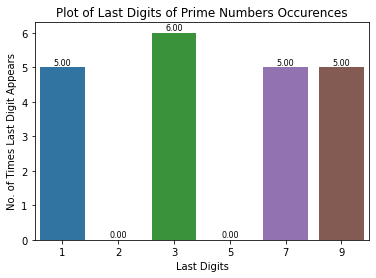

Enter 0 to stop. Enter 1 to continue: 1
Enter the first number X in your range of (X,Y): 100
Enter the last number Y in your range of (X,Y): 1000


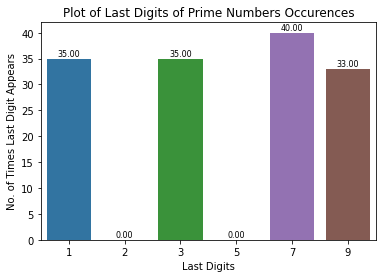

Enter 0 to stop. Enter 1 to continue: 1
Enter the first number X in your range of (X,Y): 1
Enter the last number Y in your range of (X,Y): 10


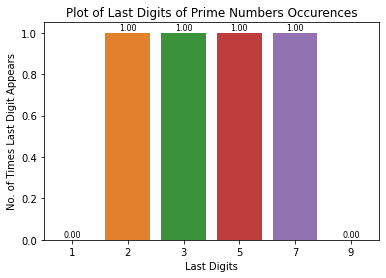

Enter 0 to stop. Enter 1 to continue: 1
Enter the first number X in your range of (X,Y): 1
Enter the last number Y in your range of (X,Y): 1000


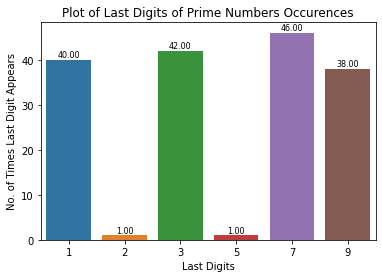

Enter 0 to stop. Enter 1 to continue: 0
Program finished with exit code 0.


In [ ]:
primeXY_bar()

## Which gaps are most common between consecutive prime numbers (e.g., the gap of 2 between 3 and 5, or the gap of 6 between 23 and 29)? 

In [ ]:
def primegap()